In [1]:
# load required packages
# Use pacman to load packages. 
# Running this for the first time might take time depending on whether
# these packages are already installed or not. 
install.packages("pacman", repos = "http://cran.us.r-project.org")
pacman::p_load(pacman,tidyverse,cluster,factoextra, dplyr, 
               readxl, ggplot2, mclust, NbClust, clValid,
               reshape2, fpc, radiant, pvclust,
               cowplot, gridExtra)

Warning message:
“package ‘pacman’ is not available (for R version 3.4.4)”

In [2]:
dataR <- read.csv('clean_payload_R.csv')

In [3]:
head(dataR)

data0,data1,data2,data3,data4,data5,data6,data7,flag
0,0,0,0,16,41,42,36,0
21,0,0,0,0,0,0,0,0
5,32,68,104,119,0,0,126,0
0,32,0,0,0,0,0,0,0
16,64,96,255,120,196,8,0,0
255,0,0,0,255,196,8,0,0


In [4]:
str(dataR)

'data.frame':	991371 obs. of  9 variables:
 $ data0: int  0 21 5 0 16 255 5 254 0 0 ...
 $ data1: int  0 0 32 32 64 0 33 80 0 33 ...
 $ data2: int  0 0 68 0 96 0 104 0 0 16 ...
 $ data3: int  0 0 104 0 255 0 9 0 0 255 ...
 $ data4: int  16 0 119 0 120 255 33 0 0 0 ...
 $ data5: int  41 0 0 0 196 196 33 60 6 255 ...
 $ data6: int  42 0 0 0 8 8 0 0 11 0 ...
 $ data7: int  36 0 126 0 0 0 112 0 112 0 ...
 $ flag : int  0 0 0 0 0 0 0 0 0 0 ...


In [5]:
table(dataR['flag'])


     0      1 
818164 173207 

In [6]:
out2 <- dataR %>%
  group_by(flag) %>%
  sample_n(1000)

In [7]:
dim(out2)

[1] 2000    9

In [8]:
head(out2)

data0,data1,data2,data3,data4,data5,data6,data7,flag
64,0,149,28,151,2,189,0,0
0,0,0,128,0,103,209,19,0
0,0,0,0,0,0,0,0,0
0,33,16,255,0,255,0,0,0
10,128,0,255,12,128,14,1,0
0,0,0,0,34,8,34,222,0


In [9]:
tail(out2)

data0,data1,data2,data3,data4,data5,data6,data7,flag
1,69,96,255,107,0,0,0,1
1,69,96,255,107,0,0,0,1
1,69,96,255,107,0,0,0,1
1,69,96,255,107,0,0,0,1
1,69,96,255,107,0,0,0,1
1,69,96,255,107,0,0,0,1


In [10]:
class(out2)

[1] "grouped_df" "tbl_df"     "tbl"        "data.frame"

In [11]:
class(dataR)

[1] "data.frame"

In [7]:
pacman::p_load(splitstackshape)


The downloaded binary packages are in
	/var/folders/s_/d5qfzls10sz1z696lmcpvtfw0000gn/T//RtmpfrnAUS/downloaded_packages



splitstackshape installed


In [8]:
library(splitstackshape)

In [9]:
set.seed(1000)
out <- stratified(dataR, c("flag"), 1000)

In [34]:
summary(as.factor(out$flag))

0    1 
1000 1000

In [12]:
dataR <- data.frame(out2)

In [13]:
class(dataR)

[1] "data.frame"

In [14]:
dim(dataR)

[1] 2000    9

In [15]:
summary(as.factor(dataR$flag))

0    1 
1000 1000

In [16]:
# create the data to cluster on and the class variable
data.new<- dataR[,-which(names(dataR) %in% c('flag'))]
data.class<- dataR[,'flag']

In [17]:
head(data.class)

[1] 0 0 0 0 0 0

In [18]:
print('Before scaling')
head(data.new,2)
scaled_data.new<- data.new %>% mutate_each_(funs(scale(.) %>% as.vector), 
                             vars=c(names(data.new)))

rownames(scaled_data.new) <- rownames(data.new)

print('After scaling')
head(scaled_data.new,2)

[1] "Before scaling"


data0,data1,data2,data3,data4,data5,data6,data7
64,0,149,28,151,2,189,0
0,0,0,128,0,103,209,19


`mutate_each()` is deprecated.
Use `mutate_all()`, `mutate_at()` or `mutate_if()` instead.
To map `funs` over a selection of variables, use `mutate_at()`


[1] "After scaling"


data0,data1,data2,data3,data4,data5,data6,data7
0.4701456,-1.387137,1.563222,-1.1241139,1.329169,-0.4570041,4.503609,-0.41927981
-0.4225800,-1.387137,-1.267428,-0.2685848,-1.278314,1.1558201,5.011931,-0.07923856


## Try PCA

## K-means clustering


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



[1] "clustering with centers(k) =2"
[1] "Clusters content"


[1] 1274  726

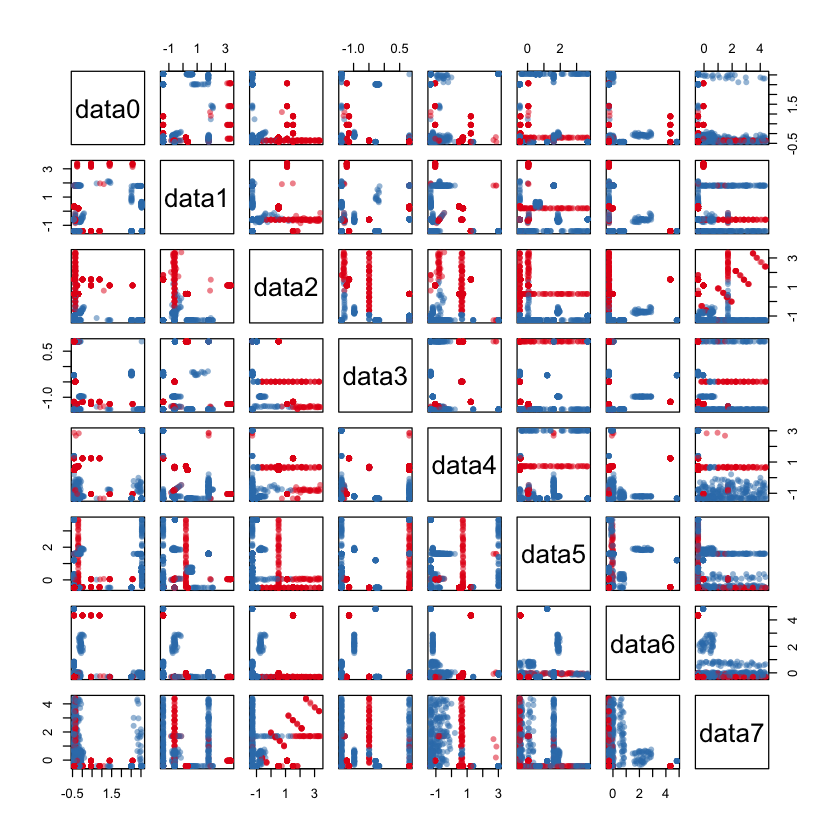

In [44]:
# Apply k-means with k=2
k2 <- kmeans(scaled_data.new, 2, nstart=25, iter.max=1000)
library(RColorBrewer)
library(scales)
print('clustering with centers(k) =2')

print('Clusters content')
k2$size # gives no. of records in each cluster
palette(alpha(brewer.pal(9,'Set1'), 0.5))
plot(scaled_data.new, col=k2$clust, pch=16)

#pulling the first two dimensions only to compare later on
p2 <- fviz_cluster(k2, geom = "point", data = scaled_data.new, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 2")

In [45]:
# How does the clustering model do?
table(data.frame(data.class, k2$cluster))

          k2.cluster
data.class    1    2
         0  274  726
         1 1000    0

[1] "clustering with centers(k) =2"
[1] "Clusters content"


[1]  101  128 1047  239   58   73  150   61   66   77

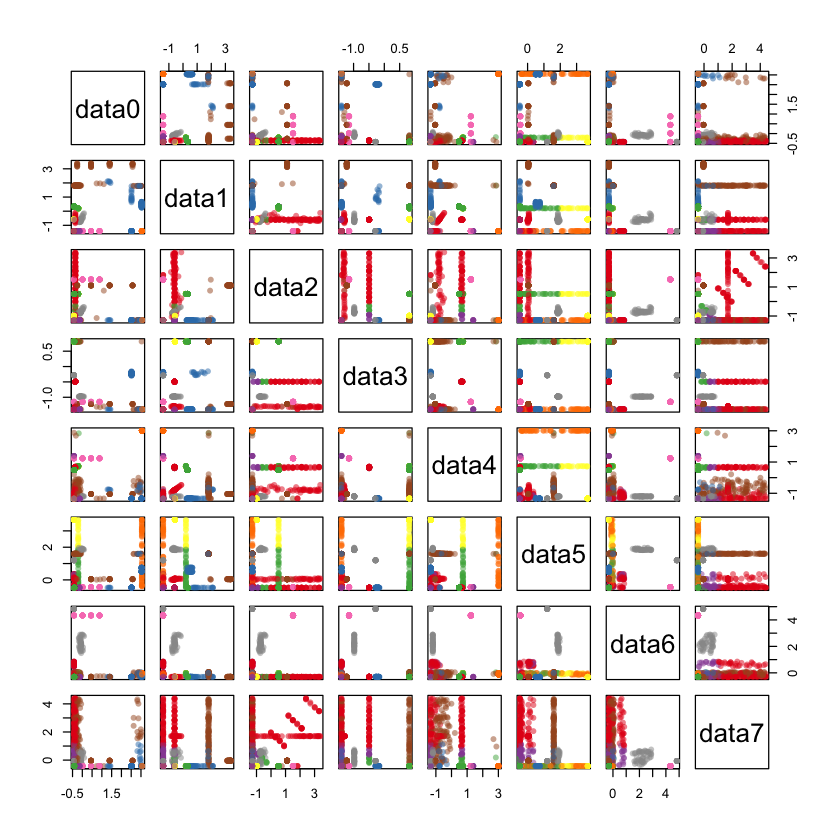

In [46]:
# Apply k-means with k=10
k10 <- kmeans(scaled_data.new, 10, nstart=25, iter.max=1000)
#library(RColorBrewer)
#library(scales)
print('clustering with centers(k) =2')

print('Clusters content')
k10$size # gives no. of records in each cluster
palette(alpha(brewer.pal(9,'Set1'), 0.5))
plot(scaled_data.new, col=k10$clust, pch=16)

#pulling the first two dimensions only to compare later on
p10 <- fviz_cluster(k10, geom = "point", data = scaled_data.new, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 10")

In [47]:
# How does the clustering model do?
table(data.frame(data.class, k10$cluster))

          k10.cluster
data.class    1    2    3    4    5    6    7    8    9   10
         0  101  128   47  239   58   73  150   61   66   77
         1    0    0 1000    0    0    0    0    0    0    0

[1] "clustering with centers(k) =20"
[1] "Clusters content"


[1]   66   40   51   52   31  202   36   51   37   28 1023   62   37   12   89   25   30   28   39   61

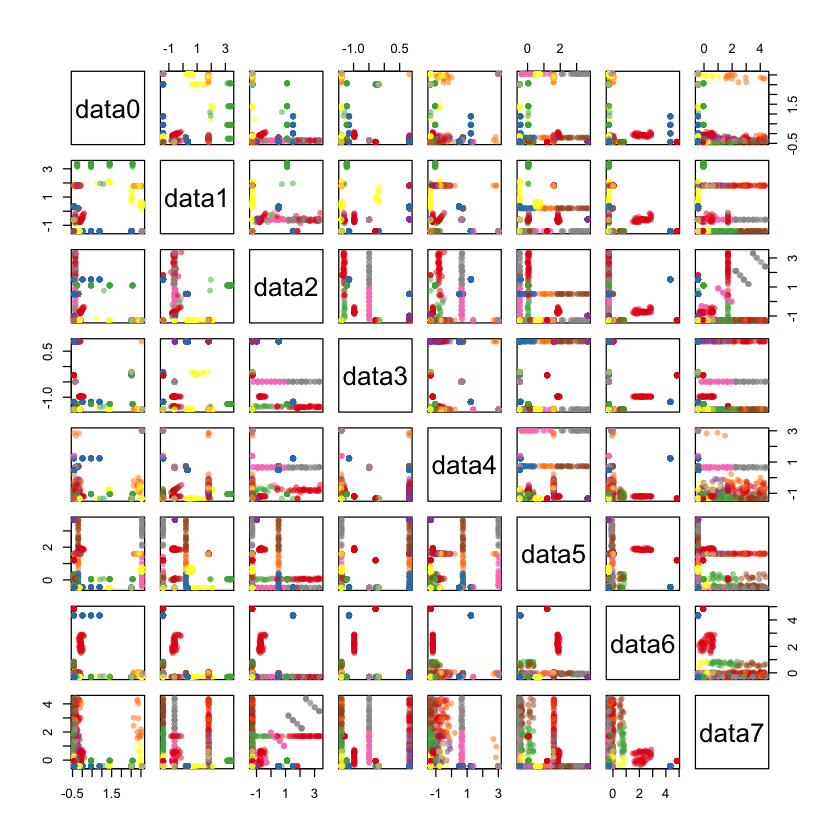

In [48]:
# Apply k-means with k=20
k20 <- kmeans(scaled_data.new, 20, nstart=25, iter.max=1000)
#library(RColorBrewer)
#library(scales)
print('clustering with centers(k) =20')

print('Clusters content')
k20$size # gives no. of records in each cluster
palette(alpha(brewer.pal(9,'Set1'), 0.5))
plot(scaled_data.new, col=k20$clust, pch=16)

#pulling the first two dimensions only to compare later on
p20 <- fviz_cluster(k20, geom = "point", data = scaled_data.new, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 20")

In [49]:
# How does the clustering model do?
table(data.frame(data.class, k20$cluster))

          k20.cluster
data.class    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20
         0   66   40   51   52   31  202   36   51   37   28   23   62   37   12   89   25   30   28   39   61
         1    0    0    0    0    0    0    0    0    0    0 1000    0    0    0    0    0    0    0    0    0

## Measure k-means effectiveness

In [50]:
clt <- scaled_data.new

# K-means models
km2 <- eclust(clt, "kmeans", k=2, nstart=25, graph = F)
km5 <- eclust(clt, "kmeans", k=5, nstart=25, graph = F)
km10 <- eclust(clt, "kmeans", k=10, nstart=25, graph = F)
km20 <- eclust(clt, "kmeans", k=20, nstart=25, graph = F)

In [51]:
km2_plot <- fviz_silhouette(km2, palette="jco", ggtheme = theme_classic())

  cluster size ave.sil.width
1       1 1274          0.70
2       2  726          0.13


In [52]:
km5_plot <- fviz_silhouette(km5, palette="jco", ggtheme = theme_classic())

  cluster size ave.sil.width
1       1  154          0.29
2       2 1173          0.79
3       3  382          0.43
4       4  211          0.24
5       5   80          0.65


In [53]:
km10_plot <- fviz_silhouette(km10, palette="jco", ggtheme = theme_classic())

   cluster size ave.sil.width
1        1  133          0.49
2        2  131          0.23
3        3 1047          0.96
4        4   73          0.66
5        5  286          0.60
6        6   58          0.67
7        7   61          0.88
8        8   52          0.70
9        9   93          0.35
10      10   66          0.58


In [57]:
km20_plot <- fviz_silhouette(km20, palette="npg", ggtheme = theme_classic())

   cluster size ave.sil.width
1        1  219          0.76
2        2   30          0.73
3        3   61          0.27
4        4   69          0.47
5        5   47          0.76
6        6   27          0.57
7        7   28          0.78
8        8   23          0.60
9        9   78          0.43
10      10   29          0.61
11      11   20          0.44
12      12   40          0.98
13      13 1024          0.99
14      14   26          0.30
15      15   28          0.67
16      16   36          0.43
17      17   83          0.57
18      18   61          0.88
19      19   52          1.00
20      20   19          1.00


Warning message:
“This manual palette can handle a maximum of 10 values. You have supplied 20.”Warning message:
“This manual palette can handle a maximum of 10 values. You have supplied 20.”

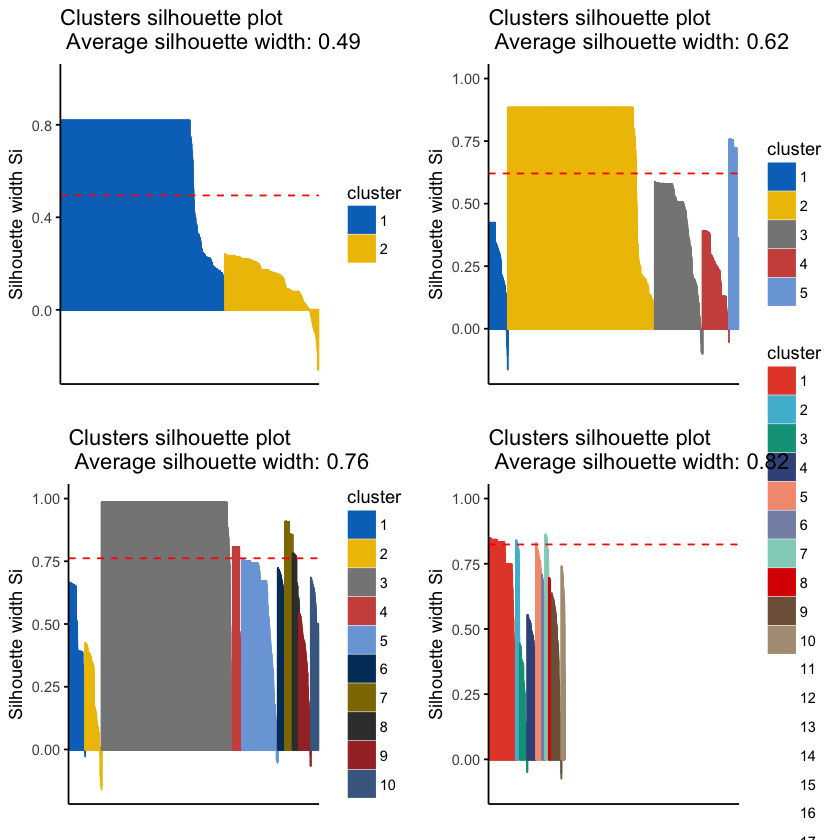

In [58]:
plot_grid(km2_plot, km5_plot, km10_plot, km20_plot)

Warning message:
“This manual palette can handle a maximum of 10 values. You have supplied 20.”Warning message:
“This manual palette can handle a maximum of 10 values. You have supplied 20.”

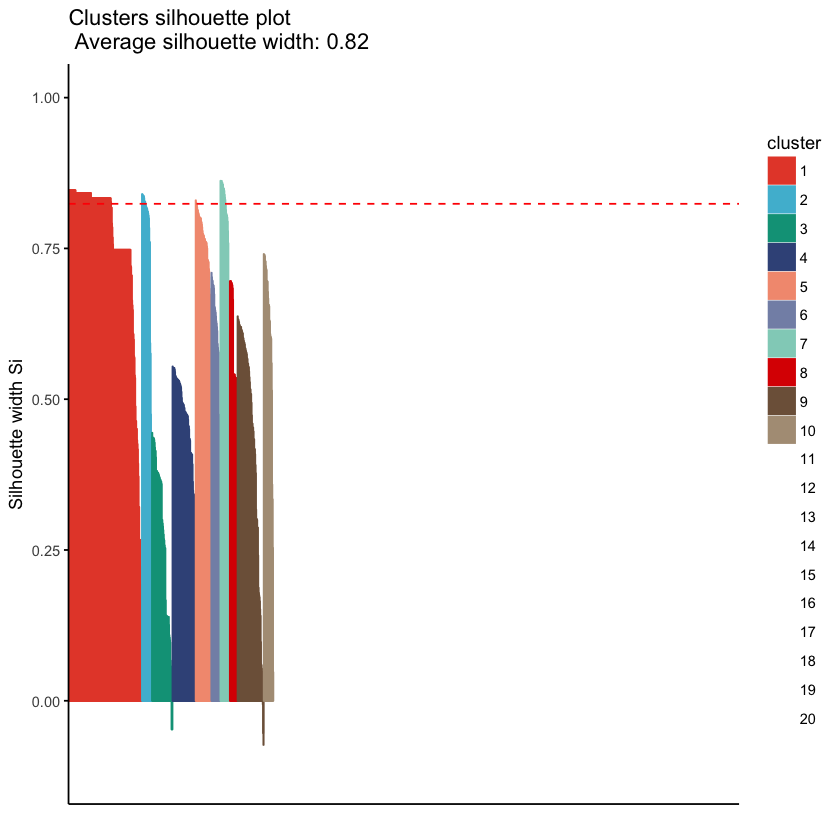

In [59]:
plot(km20_plot)palette

In [60]:
getPalette = colorRampPalette(brewer.pal(9, "Set1"))

In [61]:
km20_plot <- fviz_silhouette(km20, palette=getPalette(20), ggtheme = theme_classic())

   cluster size ave.sil.width
1        1  219          0.76
2        2   30          0.73
3        3   61          0.27
4        4   69          0.47
5        5   47          0.76
6        6   27          0.57
7        7   28          0.78
8        8   23          0.60
9        9   78          0.43
10      10   29          0.61
11      11   20          0.44
12      12   40          0.98
13      13 1024          0.99
14      14   26          0.30
15      15   28          0.67
16      16   36          0.43
17      17   83          0.57
18      18   61          0.88
19      19   52          1.00
20      20   19          1.00


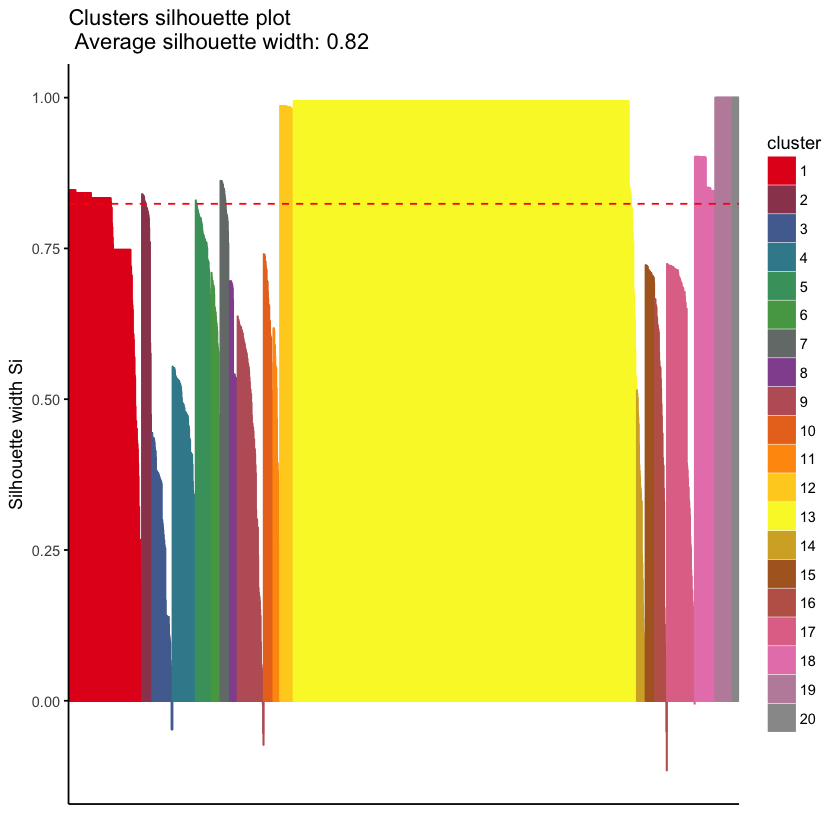

In [62]:
plot(km20_plot)

## Find the ideal number of clusters